In [1]:
import pandas as pd

train=pd.read_csv('./train.csv',sep=',')
test=pd.read_csv('./test.csv',sep=',')
spec=pd.read_csv('./spec.csv',sep=',')
birth= pd.read_csv('./birth.csv',sep=',')
train.head()

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,1,2013,3,A,52612,507H7173,96040545,2011/1/1 00:00,1,78.0,...,2013/1/1 00:00,2013/3/20 00:00,26,2013/3/21 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
1,2,2013,4,A,52612,507H7173,96040545,2011/1/1 00:00,1,107.0,...,2013/1/1 00:00,2013/4/18 00:00,27,2013/4/19 00:00,2015/5/5 00:00,507H11621,1,NaN,2013/3/5 00:00,501H8784
2,3,2013,5,A,52612,507H7173,96040545,2011/1/1 00:00,1,140.0,...,2013/1/1 00:00,2013/5/21 00:00,28,2013/5/22 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
3,4,2013,6,A,52612,507H7173,96040545,2011/1/1 00:00,1,175.0,...,2013/1/1 00:00,2013/6/25 00:00,29,2013/6/26 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784
4,5,2013,7,A,52612,507H7173,96040545,2011/1/1 00:00,1,210.0,...,2013/1/1 00:00,2013/7/30 00:00,30,2013/7/31 00:00,2015/5/5 00:00,507H11621,2,NaN,2013/3/5 00:00,501H8784


In [2]:
#設定可能需要的欄位

new_train=pd.DataFrame(data=train,columns=['3','4','5','6','7','9','11','10','14','18','21','season','times','health','weight'])
new_test=pd.DataFrame(data=test,columns=['3','4','5','6','7','9','10','14','18','21','season','times','health','weight'])

In [3]:
#train有不需要判斷的編號就去掉
print("原本的訓練資料集:",new_train.shape)
for i in range(len(new_test['5'])):
    if len(new_train.index[new_train['5'] == new_test['5'][i]]) == 0:
        new_train=new_train.drop([i])
new_train.reset_index(inplace=True)
# new_train
print("經過挑選後的訓練資料集:",new_train.shape)

原本的訓練資料集: (33254, 15)
經過挑選後的訓練資料集: (31806, 16)


In [4]:
#去除乳量為0的資料
cnt=0
print("原本的訓練資料集:",new_train.shape)
for i in range(len(new_train['11'])):
    if new_train['11'][i]==0:
        new_train=new_train.drop([i])
    # cnt+=1
# print(cnt)
print("移除異常值後的訓練資料集:",new_train.shape)

原本的訓練資料集: (31806, 16)
移除異常值後的訓練資料集: (31741, 16)


In [5]:
#對缺值補植
new_train['6']=new_train['6'].fillna("NoData").astype("str")
new_test['6']=new_test['6'].fillna("NoData").astype("str")
new_train['7']=new_train['7'].fillna("NoData").astype("str")
new_test['7']=new_test['7'].fillna("NoData").astype("str")
new_train['21']=new_train['21'].fillna("NoData").astype("str")
new_test['21']=new_test['21'].fillna("NoData").astype("str")
avg_weight = birth['6'].mean()
birth['6'] = birth['6'].fillna(birth['6'].mean())

new_train.dropna(subset=['10','6','7'], inplace=True)

new_train['year']=train['2']
new_test['year']=test['2']

In [6]:
##train對上疾病資料，當年當月有病就1，反之0
from datetime import datetime
for i in range(len(spec)):
    dd=datetime.strptime(spec['4'][i], "%Y/%m/%d %H:%M")
    if len(new_train.index[new_train['5'] == spec['1'][i]])>0:
        for j in new_train.index[new_train['5'] == spec['1'][i]]:
            if new_train['year'][j] == dd.year and new_train['3'][j] == dd.month and new_train['4'][j]==spec['7'][i]:
                new_train['health'][j] = 1
    if len(new_test.index[new_test['5'] == spec['1'][i]])>0:
        for j in new_test.index[new_test['5'] == spec['1'][i]]:
            if new_test['year'][j] == dd.year and new_test['3'][j] == dd.month and new_test['4'][j]==spec['7'][i]:
                new_test['health'][j] = 1
                
for i in range(len(birth)):
    if len(new_train.index[new_train['5'] == birth['1'][i]])>0:
        for j in new_train.index[new_train['5'] == birth['1'][i]]:
                new_train['weight'][j] = birth['6'][i]
    if len(new_test.index[new_test['5'] == birth['1'][i]])>0:
        for j in new_test.index[new_test['5'] == birth['1'][i]]:
                new_test['weight'][j] = birth['6'][i]
new_train['weight'] = new_train['weight'].fillna(avg_weight)
new_test['weight'] = new_test['weight'].fillna(avg_weight)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on 

In [7]:
#對缺值補植
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [8]:
#重新整理索引值
new_train.reset_index(inplace=True)

In [9]:
#季節設定
for i in range(len(new_train['3'])):
    if int(new_train['3'][i]) >=3 and int(new_train['3'][i])<=5:
        new_train['season'][i] = "Spring"
    elif int(new_train['3'][i]) >=6 and int(new_train['3'][i])<=8:
        new_train['season'][i] = "Summer"
    elif int(new_train['3'][i]) >=9 and int(new_train['3'][i])<=11:
        new_train['season'][i] = "Autumn"
    else:
        new_train['season'][i] = "Winter"
        
for i in range(len(new_test['3'])):
    if int(new_test['3'][i]) >=3 and int(new_test['3'][i])<=5:
        new_test['season'][i] = "Spring"
    elif int(new_test['3'][i]) >=6 and int(new_test['3'][i])<=8:
        new_test['season'][i] = "Summer"
    elif int(new_test['3'][i]) >=9 and int(new_test['3'][i])<=11:
        new_test['season'][i] = "Autumn"
    else:
        new_test['season'][i] = "Winter"

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.

In [10]:
#對缺值補值
new_train=new_train.fillna(0)
new_test=new_test.fillna(0)

In [11]:
y=new_train['11']

In [12]:
#挑選需要測試的特徵欄位
new_train_backup = new_train
new_test_backup = new_test
new_train=pd.DataFrame(data=new_train_backup,columns=['3','4','5','9','10','14','18','season','weight','times'])
new_test=pd.DataFrame(data=new_test_backup,columns=['3','4','5','9','10','14','18','season','weight','times'])

In [13]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['4'] = labelencoder.fit_transform(all_data['4'])
all_data['5'] = labelencoder.fit_transform(all_data['5'])
# all_data['6'] = labelencoder.fit_transform(all_data['6'])
all_data['season'] = labelencoder.fit_transform(all_data['season'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])
all_data.head()

,3,4,5,9,10,14,18,season,weight,times
0,2,0,0,1,78.0,26,1,1,568.152174,0.0
1,3,0,0,1,107.0,27,1,1,568.152174,0.0
2,4,0,0,1,140.0,28,2,1,568.152174,0.0
3,5,0,0,1,175.0,29,2,2,568.152174,0.0
4,6,0,0,1,210.0,30,2,2,568.152174,0.0


In [14]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features =[0,1,2,3,5,6,7,9])
# enc = OneHotEncoder()
enc.fit(all_data)
X=enc.transform(new_train).toarray()
X_test=enc.transform(new_test).toarray()
X.shape

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(31740, 2251)

In [15]:
#設定訓練集和驗證集
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
#定義RMSE
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

Using TensorFlow backend.


In [17]:
#模型設定
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.optimizers import *

model=Sequential()
model.add(Dense(2048,input_dim=2251,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss=rmse,optimizer=Adam(lr=1e-3),metrics=[rmse])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
#開始訓練
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=64,epochs=10,verbose=1)

Train on 25392 samples, validate on 6348 samples
Epoch 1/10
25392/25392 [==============================] - 7s 263us/step - loss: 9.0748 - rmse: 9.0728 - val_loss: 6.4833 - val_rmse: 6.4754
Epoch 2/10
25392/25392 [==============================] - 6s 248us/step - loss: 6.4536 - rmse: 6.4545 - val_loss: 5.9534 - val_rmse: 5.9385
Epoch 3/10
25392/25392 [==============================] - 6s 247us/step - loss: 6.0294 - rmse: 6.0291 - val_loss: 5.8135 - val_rmse: 5.8026
Epoch 4/10
25392/25392 [==============================] - 6s 248us/step - loss: 5.8560 - rmse: 5.8558 - val_loss: 5.5832 - val_rmse: 5.5710
Epoch 5/10
25392/25392 [==============================] - 6s 248us/step - loss: 5.5821 - rmse: 5.5816 - val_loss: 6.1387 - val_rmse: 6.1309
Epoch 6/10
25392/25392 [==============================] - 6s 248us/step - loss: 5.4239 - rmse: 5.4238 - val_loss: 5.3569 - val_rmse: 5.3474
Epoch 7/10
25392/25392 [==============================] - 6s 248us/step - loss: 5.4094 - rmse: 5.4096 - val_los

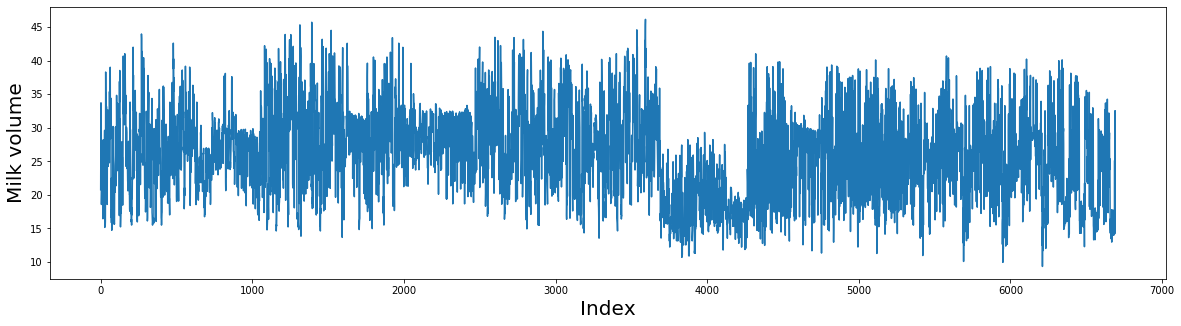

In [19]:
#劃出測試集預測結果
import matplotlib.pyplot as plt
%matplotlib inline

prediction=model.predict(X_test)
plt.figure(figsize=(20,5))
plt.xlabel('Index',fontsize=20)
plt.ylabel('Milk volume',fontsize=20)
plt.plot(prediction)

In [20]:
#輸出預測結果
sub=pd.read_csv('./submission.csv',sep=',')
sub['1']=prediction
sub.to_csv('predict.csv',index=False)